In [1]:
%%capture
%pip install sympy numpy matplotlib

AVALIAÇÃO AC2 - PROJETO LP INTERATIVO - ANÁLISE DE SENSIBILIDADE

<h1>Solução Gráfica do Problema de Otimização Linear com Restrições Interativas para Análise de Sensibilidade</h1>

<hr />

<h3>Construindo a análise do problema Cenário Função Lambda AWS</h3>

<p>A equipe de Analistas de SI propôs um cenário inicial para simular o crescimento da solução Serverless Lambda AWS do projeto que foi incorporado a uma grande marca mundial, elevando consideravelmente as requisições a URL1 e URL2 externas e consequentemente as invocações (chamadas) feitas pela função lambda. Para realizar os testes, a equipe criou 2 cenários e a contabilização de custos para esse parceiro novo. O cenário 1 tem um limite financeiro de 300 USD enquanto o o cenário 2 um limite de  200 USD. Cada lambda pode ser usada durante 8 por dia, e escalonam o crawler nas mesmas URLs com tempos diferentes.</p>

<p>A lambda1 faz a captura a cada 2 horas na URL1 e a cada 1 hora na URL2.<br /
>A lambda2 faz a captura a cada 1 hora na URL1 e a cada 2 horas na URL2</p>

<p>Dadas as restrições de tempo captura e a quantidade de requisições, os analistas de SI  procuram determinar quantas das URL1 e URL2 terão suas requsições respondidas para cada uma das lambdas de modo a maximizar os lucros mensais.

<p>Os analistas configuraram o problema como uma tabela a seguir.</p>

<div>
    <table>
        <thead>
            <tr>
                <th>URL</th>
                <th>Lambda 1</th>
                <th>Lambda 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>URL 1</td>
                <td>2 hrs</td>
                <td>1 hrs</td>
            </tr>
            <tr>
                <td>URL 2</td>
                <td>1 hrs</td>
                <td>2 hrs</td>
            </tr>
            <tr>
                <td>Periodo utilização</td>
                <td>8 hrs</td>
                <td>8 hrs</td>
            </tr>
            <tr>
                <td>Lucro Unitário</td>
                <td>&#36;300</td>
                <td>&#36;200</td>
            </tr>
        </tbody>
    </table>
</div></p>


Em seguida, definiram a função objetivo com as duas lambdas  que são as duas variáveis ​​de decisão. Os lucros se tornam os coeficientes para cada função.

Seja x1 = Lambda 1

Seja x2 = Lambda 2

A Função Objetivo é então definida como:

Z = 300x1 + 200x2

In [2]:
# Definição das variáveis de decisão do lucro sobre a melhor solução
x1_lucro = 300
x2_lucro = 200

As restrições são definidas como o máximo de horas por dia que cada lambda pode ser executada. O número de horas que cada lambda leva para chamar a URL são os  coeficientes para x1 e x2.

2x1 + 1x2 <= 8 horas (Lambda 1)

1x1 + 2x2 <= 8 horas (Lambda 2)

Para resolver e plotar as restrições, as fórmulas devem ser transformadas para o formato:

2x1 + 1x2 - 8 horas (Lambda 1)

1x1 + 2x2 - 8 horas (Lambda 2)

Por fim, existem restrições onde cada variável deve ser >= 0, definido como:

x1 >= 0, x2 >= 0

Definiram variáveis ​​de restrição como número de horas necessárias por lambda.
Atribiram o coeficiente ainda desconhecido para cada invocação de lambda a ser acionado.

Seja x11 =  a ser resolvido

Seja x12 =  a ser resolvido

Seja x21 =  a ser resolvido

Seja x22 =  a ser resolvido

O máximo de horas operacionais é de 8 horas/dia para cada lambda ser acionada.

In [3]:
x11 = 2; x12 = 1; max_hrs_x1 = 8
x21 = 1; x22 = 2; max_hrs_x2 = 8

In [4]:
# Importar bibliotecas.
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, solve  #(Biblioteca de simulação que contem o Solve)

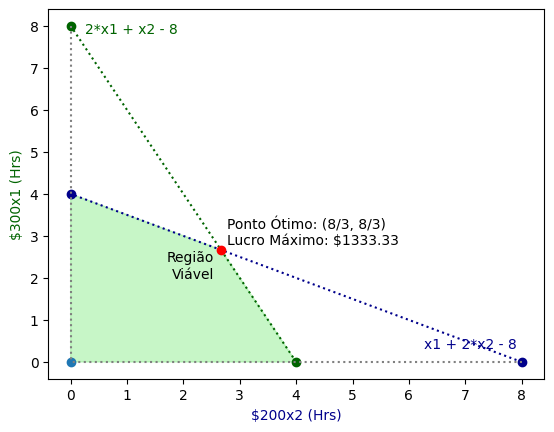

In [5]:
def get_bound(x1, x2, limit):
    x_1 = [limit/x1, 0.0]
    x_2 = [0.0, limit/x2]
    return x_1, x_2


def plot_solution(x11, x12, max_hrs_x1, x1_lucro, x21, x22, max_hrs_x2, x2_lucro):
    # Cria variáveis x1 e x2 por meio do Simpy.
    s1 = Symbol('x1')
    s2 = Symbol('x2')

    # Obter os limites (pontos)para as restrições.
    x1, y1 = get_bound(x11, x12, max_hrs_x1)
    x2, y2 = get_bound(x21, x22, max_hrs_x2)

    # Definição das fórmulas para as restrições.
    constraint1 = x11*s1 + x12*s2 - max_hrs_x1
    constraint2 = x21*s1 + x22*s2 - max_hrs_x2

    # Solve para as restrições.Encontrar o ponto de interceção das linhasde restrição.
    soln = solve((constraint1, constraint2), dict=True)[0] #aqui o solve retorna a solução como um dicionário.
    intersect_x = soln[s1]
    intersect_y = soln[s2]

    # Função objetiva.
    max_lucro_formula = x1_lucro*s1 + x2_lucro*s2

    # Solução final - maximização lucro.
    max_lucro = float(max_lucro_formula.subs({'x1': intersect_x, 'x2': intersect_y}))

    # Plot a primeira restrição.
    plt.plot(x1, y1, linestyle=':', marker='o', color='darkgreen')
    # Rótulo da restrição.
    plt.annotate(
        constraint1,
        (0, max_hrs_x1),
        textcoords="offset points",
        xytext=(10, -5),
        ha='left',
        color='darkgreen'
    )

    # Plot a segunda restrição.
    plt.plot(x2, y2, linestyle=':', marker='o', color='darkblue')
    # Rotulod a restrição.
    plt.annotate(
        constraint2,
        (max_hrs_x2, 0),
        textcoords="offset points",
        xytext=(-70, 10),
        ha='left',
        color='darkblue'
    )

    # Plot limites do gráfico for x1 >= 0 and x2 >= 0.
    plt.plot(0,0, marker='o')
    plt.plot([0, 0], [max_hrs_x1, 0], linestyle=':', color='grey')
    plt.plot([max_hrs_x2, 0], [0, 0], linestyle=':', color='grey')

    # Preenchimento da região viável
    plt.fill(
        [0, 0, intersect_x, x1[0]],
        [0, y2[1], intersect_y, 0],
        color='lightgreen', alpha=0.5
    )

    # Plot ponto para o lucro máximo.
    plt.plot(intersect_x, intersect_y, marker='o', color='red')
    # Plot rórulo máximo lucro.
    plt.annotate(
        f"Ponto Ótimo: ({intersect_x}, {intersect_y})\nLucro Máximo: ${max_lucro:0.2f}",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(4,4),
        ha='left')
    plt.annotate(
        "Região\nViável",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(-5,-20), ha='right'
    )
    # Desenhar rótulos dos eixos X e Y.
    plt.xlabel(f"${x2_lucro}x2 (Hrs)", color='darkblue')
    plt.ylabel(f"${x1_lucro}x1 (Hrs)", color='darkgreen')
    # Reenderização.
    plt.show()

# Teste de  plotagem.
plot_solution(x11, x12, max_hrs_x1, x1_lucro, x21, x22, max_hrs_x2, x2_lucro)

## Adicionando controles interativos para cenários "e se"? Análise de Sensibilidade

Observe que com este recurso é possível ajustar a sensibilidade do modelo - Análise de sensibilidade.
Agora, suponha que o cliente gostaria de atualizar facilmente o modelo conforme o tempo e os lucros mudam e/ou incluir novas lambdas/URLs que levem menos tempo. Podemos configurar um painel de pywidgets para tornar o gráfico interativo e abordar cenários "e se" conforme as variáveis ​​mudam.

In [6]:
import ipywidgets as widgets

x11_slider = widgets.IntSlider(value=x11, min=1, max=10, step=1, description='x11')
x12_slider = widgets.IntSlider(value=x12, min=1, max=10, step=1, description='x12')
max_hrs_x1_slider = widgets.IntSlider(value=max_hrs_x1, min=1, max=10, step=1, description='Max Hrs Lambda 1')
x1_lucro_slider = widgets.IntSlider(value=x1_lucro, min=0, max=500, step=10, description='Lambda 1 lucro')

x21_slider = widgets.IntSlider(value=x21, min=1, max=10, step=1, description='x21')
x22_slider = widgets.IntSlider(value=x22, min=1, max=10, step=1, description='x22')
max_hrs_x1_slider = widgets.IntSlider(value=max_hrs_x2, min=1, max=10, step=1, description='Max Hrs Lambda 2')
x2_lucro_slider = widgets.IntSlider(value=x2_lucro, min=0, max=500, step=10, description='Lambda 2 Lucro')

def compute(x11, x12, max_hrs_x1, x1_lucro, x21, x22, max_hrs_x2, x2_lucro):
    try:
        plot_solution(x11, x12, max_hrs_x1, x1_lucro, x21, x22, max_hrs_x2, x2_lucro)
    except:
        pass

widgets.interactive(
    compute,
    x11=x11_slider.value,
    x12=x12_slider.value,
    max_hrs_x1=max_hrs_x1_slider.value,
    x1_lucro=x1_lucro_slider.value,
    x21=x21_slider.value,
    x22=x22_slider.value,
    max_hrs_x2=max_hrs_x1_slider.value,
    x2_lucro=x2_lucro_slider.value
)

interactive(children=(IntSlider(value=2, description='x11', max=6, min=-2), IntSlider(value=1, description='x1…